In [39]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('data/selected_features.csv')
data.head()
print(data.columns)
data = data.drop('price actual ewm', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data.drop('price actual', axis=1), data['price actual'], test_size=0.2, random_state=42)

Index(['price actual', 'generation fossil hard coal',
       'generation hydro pumped storage consumption', 'price actual ewm',
       'generation fossil hard coal ewm',
       'generation hydro pumped storage consumption ewm',
       'generation other renewable', 'generation fossil oil ewm',
       'generation other renewable ewm', 'generation other ewm'],
      dtype='object')


In [32]:
reg = xgb.XGBRegressor(n_estimators=1000000)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

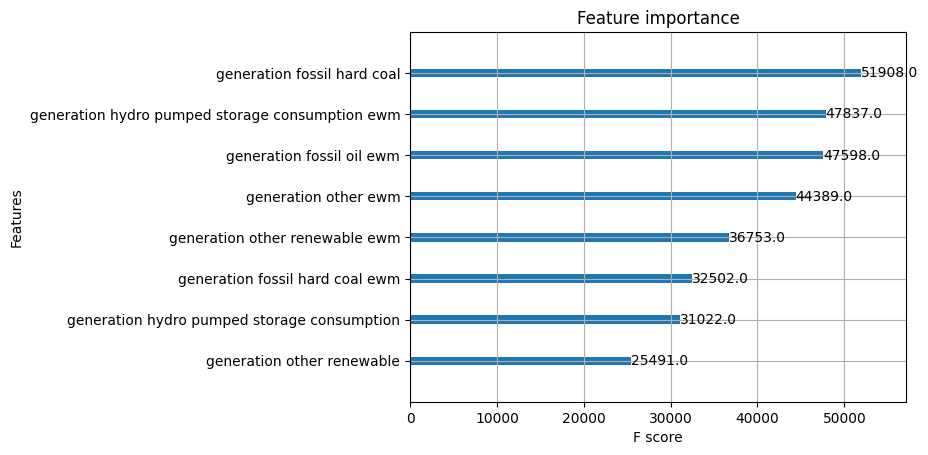

In [33]:
xgb.plot_importance(reg)

In [53]:
y_pred = reg.predict(X_test)

plt.figure(figsize=(20, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

ValueError: feature_names mismatch: ['generation fossil hard coal', 'generation hydro pumped storage consumption', 'generation fossil hard coal ewm', 'generation hydro pumped storage consumption ewm', 'generation other renewable', 'generation fossil oil ewm', 'generation other renewable ewm', 'generation other ewm'] ['generation fossil hard coal', 'generation hydro pumped storage consumption', 'generation fossil hard coal ewm', 'generation hydro pumped storage consumption ewm', 'generation other renewable', 'generation fossil oil ewm', 'generation other renewable ewm', 'generation other ewm', 'price actual Prediction']
training data did not have the following fields: price actual Prediction

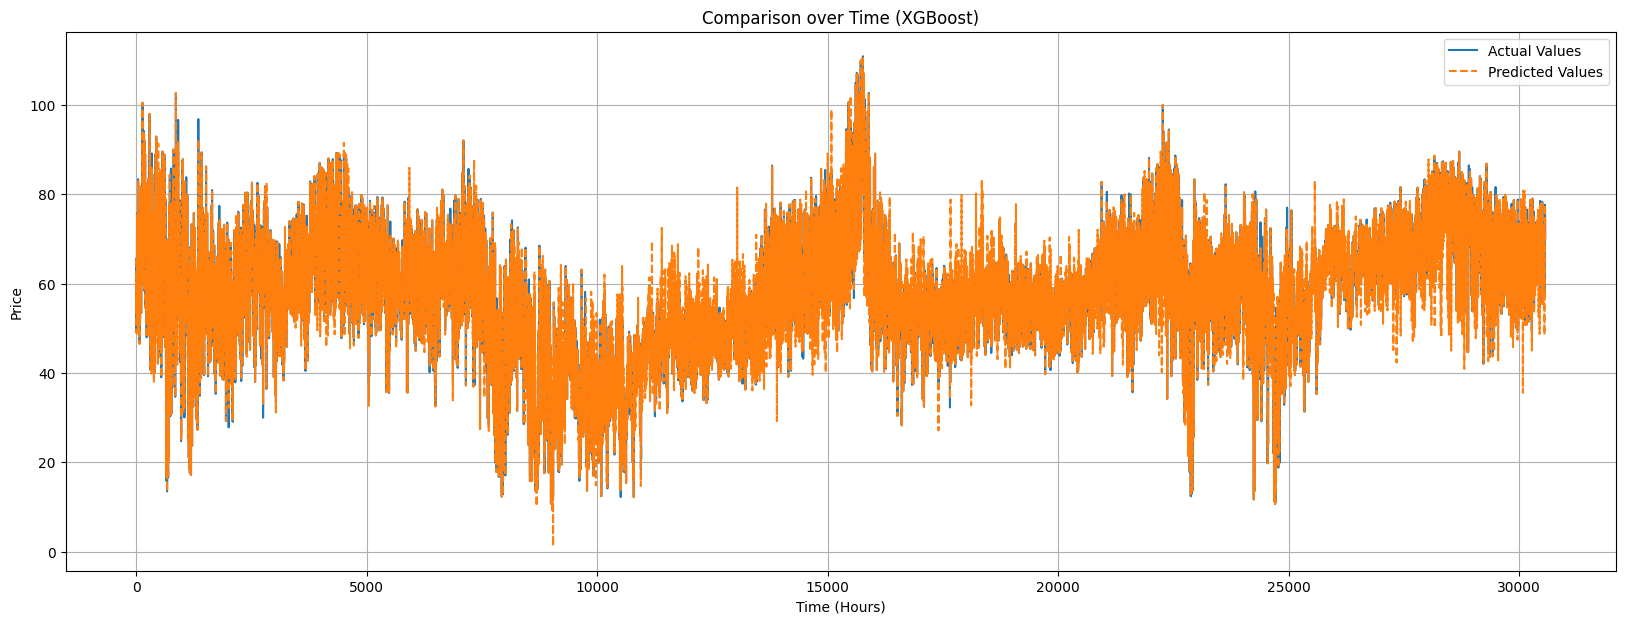

In [51]:
#Plot the xgb predictionagainst the total data
y_pred_total = reg.predict(data.drop('price actual', axis=1))

plt.figure(figsize=(20, 7))
plt.plot(data['price actual'], label='Actual Values')
plt.plot(y_pred_total, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Calculating and printing the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(y_test)

#save the prediction data to csv
xgb = pd.DataFrame(y_pred)
xgb.to_csv('data/xgb.csv', index=False, header=False)

ValueError: Found input variables with inconsistent numbers of samples: [6113, 30563]